## Customer Demographics Data Analysis:
As part of this notebook, below are the few data cleaning and data preprocessing tasks:
* 1 Irrelevent column was present and such columns were dropped from the dataset.
* There were 5 columns which have  Missing values. For such columns based on the volumn of the missing values either the records were dropped or appropiate values were imputed at places of missing values
* For gender column there was no standardisation of data. Based on the values available the column data was standardised to remove data inconsistency.
* The Date of Birth column was transformed to create a new feature column 'Age' and 'Age Group' to check for discripency of age distribution. An outlier was observed and the record was removed.
* Checked whether there are duplicate records present in the dataset. In this dataset there were no duplicate records.

In [1]:
import pandas as pd

In [100]:
df = pd.read_excel(r"C:\Users\ibeme\Downloads\Datasets\Raw_data.xlsx",sheet_name= 'CustomerDemographic')

C:\Users\ibeme\AppData\Local\Temp\ipykernel_25892\483675606.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel(r"C:\Users\ibeme\Downloads\Datasets\Raw_data.xlsx",sheet_name= 'CustomerDemographic')


In [101]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [17]:
df.shape

(4000, 13)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [103]:
df.select_dtypes(exclude=object)

,customer_id,past_3_years_bike_related_purchases,DOB,tenure
0,1,93,1953-10-12,11.0
1,2,81,1980-12-16,16.0
2,3,61,1954-01-20,15.0
3,4,33,1961-10-03,7.0
4,5,56,1977-05-13,8.0
...,...,...,...,...
3995,3996,8,1975-08-09,19.0
3996,3997,87,2001-07-13,1.0
3997,3998,60,NaT,NaN
3998,3999,11,1973-10-24,10.0


In [20]:
df.select_dtypes(include=object)

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
0,Laraine,Medendorp,F,Executive Secretary,Health,Mass Customer,N,"""'",Yes
1,Eli,Bockman,Male,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes
2,Arlin,Dearle,Male,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes
3,Talbot,NaN,Male,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No
4,Sheila-kathryn,Calton,Female,Senior Editor,NaN,Affluent Customer,N,NIL,Yes
...,...,...,...,...,...,...,...,...,...
3995,Rosalia,Halgarth,Female,VP Product Management,Health,Mass Customer,N,-100,No
3996,Blanch,Nisuis,Female,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes
3997,Sarene,Woolley,U,Assistant Manager,IT,High Net Worth,N,NaN,No
3998,Patrizius,NaN,Male,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes


In [104]:
#Irrelavant column is dropped
df.drop('default',axis= 1,inplace=True)

In [22]:
df.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [23]:
100*df.isna().sum()/len(df)

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

In [24]:
df[df.isna()].head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# Checking for the presence of first name and customer id in records where last name is missing.
df[df['last_name'].isnull()]['first_name'].isnull().sum()

0

In [106]:
df['last_name'].fillna('None',axis=0,inplace=True)

In [107]:
df['last_name'].isnull().sum()

0

In [68]:
df['DOB'].isnull().mean()*100

0.0

In [108]:
#Since less than 5 % of data has null date of birth. we can remove the records where date of birth is null.
df['DOB'].dropna(axis=0, inplace = True)

In [109]:
drop_index = df[df['DOB'].isnull()].index

In [110]:
df.drop(index=drop_index,axis = 0,inplace = True)

In [111]:
# Creating Age column
from datetime import date
date.today()

datetime.date(2024, 2, 14)

In [112]:
def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['Age'] = df['DOB'].apply(age)


In [70]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,70
3,4,Talbot,None,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,62
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,46


(array([135., 223., 224., 175., 224., 283., 244., 529., 418., 270., 204.,
        294., 194., 212., 190.,  88.,   0.,   0.,   2.,   1.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 21.  ,  24.18,  27.36,  30.54,  33.72,  36.9 ,  40.08,  43.26,
         46.44,  49.62,  52.8 ,  55.98,  59.16,  62.34,  65.52,  68.7 ,
         71.88,  75.06,  78.24,  81.42,  84.6 ,  87.78,  90.96,  94.14,
         97.32, 100.5 , 103.68, 106.86, 110.04, 113.22, 116.4 , 119.58,
        122.76, 125.94, 129.12, 132.3 , 135.48, 138.66, 141.84, 145.02,
        148.2 , 151.38, 154.56, 157.74, 160.92, 164.1 , 167.28, 170.46,
        173.64, 176.82, 180.  ]),
 <BarContainer object of 50 artists>)

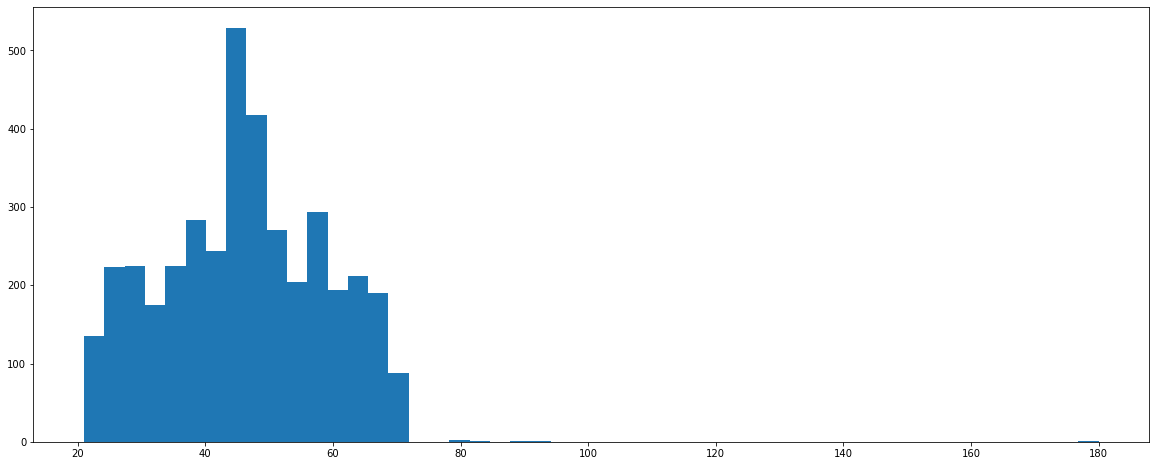

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,8))
plt.hist(df['Age'],bins = 50)

In [114]:
#Outlier detection
df[df['Age']>100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,180


In [115]:
age_index = df[df['Age']>100].index

In [116]:
#Removing outliers
df.drop(index=age_index,inplace = True)

In [117]:
df.isnull().mean()

customer_id                            0.000000
first_name                             0.000000
last_name                              0.000000
gender                                 0.000000
past_3_years_bike_related_purchases    0.000000
DOB                                    0.000000
job_title                              0.127045
job_industry_category                  0.167689
wealth_segment                         0.000000
deceased_indicator                     0.000000
owns_car                               0.000000
tenure                                 0.000000
Age                                    0.000000
dtype: float64

In [118]:
df[df['job_title'].isnull()].head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
3,4,Talbot,None,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,62
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,57
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,47
10,11,Uriah,Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,N,No,9.0,69
21,22,Deeanne,Durtnell,Female,79,1962-12-10,NaN,IT,Mass Customer,N,No,11.0,61


In [119]:
df['job_title'].fillna('Missing',axis = 0, inplace=True)

In [120]:
df['job_industry_category'].fillna('Missing',axis = 0, inplace=True)

In [121]:
df.select_dtypes(include='object').columns

Index(['first_name', 'last_name', 'gender', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car'],
      dtype='object')

In [122]:
df['gender'].value_counts()

Female    2037
Male      1872
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [123]:
df['gender'] = df['gender'].map(lambda x:'Female' if x in ('Femal','F','Female') else 'Male')

In [124]:
df['gender'].value_counts()

Female    2039
Male      1873
Name: gender, dtype: int64

In [125]:
df['wealth_segment'].value_counts()

Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: wealth_segment, dtype: int64

In [126]:
df['deceased_indicator'].value_counts()

N    3910
Y       2
Name: deceased_indicator, dtype: int64

In [127]:
df['owns_car'].value_counts()

Yes    1974
No     1938
Name: owns_car, dtype: int64

In [129]:
#Duplicate check

df.duplicated().sum()

0

In [130]:
#Finally writing the cleaned dataframe into a csv file
df.to_csv(r"C:\Users\ibeme\Downloads\Datasets\Customer_demo.csv")